# Construindo uma CNN com TensorFlow e Keras

O Keras fornece classes de acesso incorporadas para o MNIST. É importante notar que os dados MNIST chegam já separados em dois conjuntos:

* **treino** 
* **teste** 

In [1]:
# Imports
from keras.datasets import mnist

# Comando para carregar o Treino e Teste
# x indicada a entrada dos dados (variáveis preditoras)
# y indica os rótulos/labels de saída
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print do Shape (formato dos dados)
print("Shape x_train: {}".format(x_train.shape))
print("Shape y_train: {}".format(y_train.shape))
print()
print("Shape x_test: {}".format(x_test.shape))
print("Shape y_test: {}".format(y_test.shape))

#Teremos como resposta o shape das variáveis de treino e de teste.

Shape x_train: (60000, 28, 28)
Shape y_train: (60000,)

Shape x_test: (10000, 28, 28)
Shape y_test: (10000,)


# Visualizando os Dígitos

In [2]:
# Display como texto
from IPython.display import display
import pandas as pd

print("Shape do dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Display de um único dígito
single = x_train[0]
print("\nShape de um Único Dígito: {}".format(single.shape))

display(pd.DataFrame(single.reshape(28,28)))

# Aqui será indicado o Shape dos dados e será indicado em (y) os labels indicando qual digidito se refere.
# Mostra o Shape de um unico digito
# Onde tenho zero na matriz indica que não tenho presença do digito

Shape do dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]

Shape de um Único Dígito: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Imagem (#101) é o dígito '7'


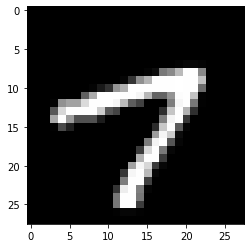

In [3]:
# Display como imagem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 101 
a = x_train[digit]
plt.imshow(a, cmap = 'gray', interpolation = 'nearest')
print("Imagem (#{}) é o dígito '{}'".format(digit, y_train[digit]))

# Aqui é a imagem para o ser humano.

# Preparando os Dados

In [4]:
import keras
from keras import backend as backend

# Input das dimensões das imagens
img_rows, img_cols = 28, 28

# Reshape dos dados de treino e de teste e input_shape - conferindo o shape.
# comando para verificar onde está o canal de Cor.
# 1 se ele estiver antes, se não, coloco no final
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Conversão para float32 - Padrão do TensorFlow
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Ajuste de escala
x_train /= 255
x_test /= 255

# Print
print('x_train shape:', x_train.shape)
print("Exemplos de Treino: {}".format(x_train.shape[0]))
print("Exemplos de Teste: {}".format(x_test.shape[0]))
print("Input Shape: {}".format(input_shape))

x_train shape: (60000, 28, 28, 1)
Exemplos de Treino: 60000
Exemplos de Teste: 10000
Input Shape: (28, 28, 1)


## Definindo a CNN

In [5]:
from keras.models import Sequential #Senquencial permite inserir camadas na rede
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# Conv2D nos permite construir a camada de convolução

# Definindo os hiperparâmetros
batch_size = 128
num_classes = 10
epochs = 12

# Converte vetores de classe para matrizes de classe binária
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Modelo CNN
# https://keras.io/layers/convolutional/#conv2d
model = Sequential()
# filters = Quantidade de filtros na convolução
# kernel_size = tamanho do filtro(2x2)
# padding = garante o parametro que o tamanho do filtro é igual ao tamenho do volume de entrada
# activation = função de ativação

model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
# Maxpooling = Diminui a dimensionalidade do meu conjunto de dados.
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
# flatten achatamento dos dados
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compilação do modelo
# crossentrop = critério do calculo da perda
# Adadelta = Algoritmo de Otimização
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

Observe que aumentamos a quantidade de filtros. Isso se deve ao fato que queremos aumentar a profundidade do nosso array, ao mesmo tempo que reduzimos altura e largura com a camada Max Pooling. O processo de convolução tem exatamente o objetivo de tornar o array mais profundo, enquanto a camada Max Pooling reduz o espaço dimensional. Basicamente fazemos isso: convertemos um quadrado representando uma imagem em vários pequenos quadrados representando cada um características das imagens. No final, entregamos esse array a uma camada totalmente conectada e fazemos a classificação.
![CNN](images/cnn_architecture.png "CNN")

## Treinamento da CNN

In [6]:
import tensorflow as tf

# Fit do modelo do objeto modol
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/12
469/469 - 9s - loss: 2.2971 - accuracy: 0.1277 - val_loss: 2.2874 - val_accuracy: 0.1542
Epoch 2/12
469/469 - 8s - loss: 2.2798 - accuracy: 0.1924 - val_loss: 2.2699 - val_accuracy: 0.2317
Epoch 3/12
469/469 - 8s - loss: 2.2622 - accuracy: 0.2767 - val_loss: 2.2520 - val_accuracy: 0.3119
Epoch 4/12
469/469 - 8s - loss: 2.2441 - accuracy: 0.3469 - val_loss: 2.2333 - val_accuracy: 0.3572
Epoch 5/12
469/469 - 8s - loss: 2.2250 - accuracy: 0.3820 - val_loss: 2.2133 - val_accuracy: 0.3998
Epoch 6/12
469/469 - 8s - loss: 2.2042 - accuracy: 0.4201 - val_loss: 2.1910 - val_accuracy: 0.4487
Epoch 7/12
469/469 - 8s - loss: 2.1808 - accuracy: 0.4720 - val_loss: 2.1656 - val_accuracy: 0.4965
Epoch 8/12
469/469 - 9s - loss: 2.1538 - accuracy: 0.5049 - val_loss: 2.1360 - val_accuracy: 0.5336
Epoch 9/12
469/469 - 9s - loss: 2.1224 - accuracy: 0.5364 - val_loss: 2.1018 - val_accuracy: 0.5626
Epoch 10/12
469/469 - 9s - loss: 2.0862 - accuracy: 0.5652 - val_loss: 2.0621 - val_accuracy: 0.5852

In [7]:
model.summary()

# Fórmula: número de parâmetros em uma camada convolucional
# O número de parâmetros em uma camada convolucional depende dos valores fornecidos dos filtros, kernel_size e input_shape. 
# Vamos definir algumas variáveis:

# K - o número de filtros na camada convolucional
# F - altura e largura dos filtros convolucionais
# D_in - a profundidade da camada anterior

# Observe que K = filtros e F = kernel_size. Da mesma forma, D_in é o último valor na tupla input_shape.

# Uma vez que existem pesos F * F * D por filtro e a camada convolucional é composta por filtros K, 
# o número total de pesos na camada convolucional é:

# K * F * F * D_in. 

# Uma vez que existe um termo de bias por filtro, a camada convolucional tem bias igual ao valor de K. 
# Assim, o número de parâmetros na camada convolucional é dado por K * F * F * D_in + K.

#__________________________________________________________

# Na segunda camada pooling foi divido por 2, pois anteriormente definimos o pool_size = 2
# A Saida (14, 14, 16) torna-se a próxima entrada (14,14, 32) é 32 pois definimos 32 filtros anteriomente

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

## Avaliando a Acurácia

Note, se você estiver usando uma GPU, você pode obter a mensagem de erro ** ResourceExhaustedError **. Isso ocorre porque a GPU pode não ter RAM suficiente para prever todo o conjunto de dados ao mesmo tempo.

In [8]:
# Avaliação nos dados de teste
# Neste caso, estamos avaliando o modelo no dataset de teste inteiro. 
# Isso pode não caber na memória da GPU
score = model.evaluate(x_test, y_test, verbose=0)

# Print
print('Perda em Teste: {}'.format(score[0]))
print('Acurácia em Teste: {}'.format(score[1]))

Perda em Teste: 1.961383581161499
Acurácia em Teste: 0.6255000233650208


As GPUs são mais utilizadas durante o treinamento do que nas previsões. Para as previsões, desative a GPU ou apenas preveja em uma amostra menor. Se a seu GPU tiver memória suficiente, o código de previsão acima pode funcionar bem. Caso contrário, basta uma previsão em uma amostra com o seguinte código:

In [9]:
from sklearn import metrics

# Para avaliação do modelo usando GPU, usamos amostras dos dados de teste
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y, axis = 1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Acurácia: {}'.format(score))

Acurácia: 0.6363636363636364


In [10]:
print(small_y)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0.

# Fim